In [1]:
%matplotlib inline


# Bayesian Ridge Regression


Computes a Bayesian Ridge Regression on a synthetic dataset.

See `bayesian_ridge_regression` for more information on the regressor.

Compared to the OLS (ordinary least squares) estimator, the coefficient
weights are slightly shifted toward zeros, which stabilises them.

As the prior on the weights is a Gaussian prior, the histogram of the
estimated weights is Gaussian.

The estimation of the model is done by iteratively maximizing the
marginal log-likelihood of the observations.

We also plot predictions and uncertainties for Bayesian Ridge Regression
for one dimensional regression using polynomial feature expansion.
Note the uncertainty starts going up on the right side of the plot.
This is because these test samples are outside of the range of the training
samples.


Automatically created module for IPython interactive environment


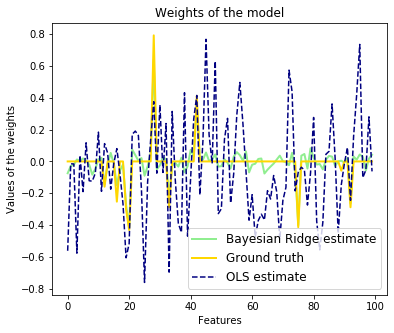

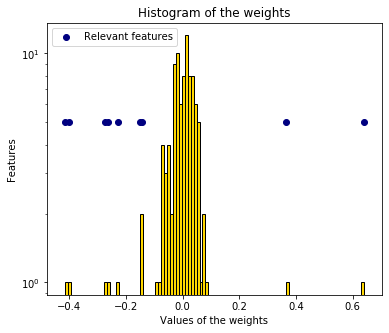

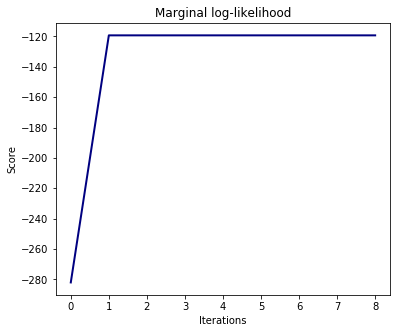

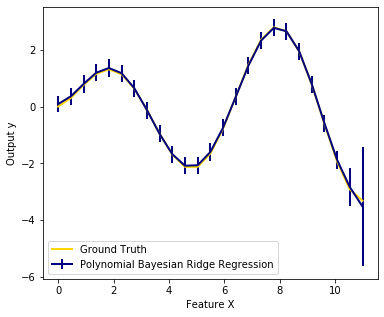

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression

# #############################################################################
# Generating simulated data with Gaussian weights
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data
# Create weights with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

# #############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")


# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise


degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()

In [16]:
from sklearn import linear_model
import pandas as pd
data = pd.read_csv('./sample_spectrum.csv')
energy = data.iloc[:,0]
intensity = data.iloc[:,1]
print(data.head())
reg = linear_model.BayesianRidge()
reg.fit(energy, intensity)
#BayesianRidge()
#plt.plot(energy, intensity, color='purple', linewidth=lw,
#         label="Ground Truth")
#plt.plot(reg.coef_, color='gold', linewidth=lw,
#         label="prediction")

   Energies (eV)  Cu1.5Te-629332-full/Cu1.0
0        8970.00                       0.03
1        8970.81                       0.03
2        8971.62                       0.03
3        8972.42                       0.04
4        8973.23                       0.04


ValueError: Expected 2D array, got 1D array instead:
array=[8970.   8970.81 8971.62 8972.42 8973.23 8974.04 8974.85 8975.66 8976.46
 8977.27 8978.08 8978.89 8979.7  8980.51 8981.31 8982.12 8982.93 8983.74
 8984.55 8985.35 8986.16 8986.97 8987.78 8988.59 8989.39 8990.2  8991.01
 8991.82 8992.63 8993.43 8994.24 8995.05 8995.86 8996.67 8997.47 8998.28
 8999.09 8999.9  9000.71 9001.52 9002.32 9003.13 9003.94 9004.75 9005.56
 9006.36 9007.17 9007.98 9008.79 9009.6  9010.4  9011.21 9012.02 9012.83
 9013.64 9014.44 9015.25 9016.06 9016.87 9017.68 9018.48 9019.29 9020.1
 9020.91 9021.72 9022.53 9023.33 9024.14 9024.95 9025.76 9026.57 9027.37
 9028.18 9028.99 9029.8  9030.61 9031.41 9032.22 9033.03 9033.84 9034.65
 9035.45 9036.26 9037.07 9037.88 9038.69 9039.49 9040.3  9041.11 9041.92
 9042.73 9043.54 9044.34 9045.15 9045.96 9046.77 9047.58 9048.38 9049.19
 9050.  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.